In [2]:
!pip install xgboost



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.3 MB/s eta 0:00:0000:0100:01






In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from xgboost import XGBRegressor

# Load the dataset
df = pd.read_csv('rating.csv')

In [4]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [5]:
# Encode the categorical variables
le = LabelEncoder()

train_df['userId'] = le.fit_transform(train_df['userId'])
train_df['movieId'] = le.fit_transform(train_df['movieId'])

test_df['userId'] = le.fit_transform(test_df['userId'])
test_df['movieId'] = le.fit_transform(test_df['movieId'])


In [6]:
# Define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=2))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


2023-05-10 08:12:28.730961: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64

2023-05-10 08:12:28.731009: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)

2023-05-10 08:12:28.731042: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tensorflow-2-8-20230510-004424): /proc/driver/nvidia/version does not exist

2023-05-10 08:12:28.731386: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA

To enable them in other operations, rebuild TensorFlow with the appropriate compiler

In [7]:
# Train the neural network model
history = model.fit(train_df[['userId', 'movieId']], train_df['rating'], 
                    validation_data=(test_df[['userId', 'movieId']], test_df['rating']), 
                    epochs=10, batch_size=128)


Epoch 1/10

125002/125002 [==============================] - 235s 2ms/step - loss: 39355.0078 - val_loss: 1.1070

Epoch 2/10

125002/125002 [==============================] - 233s 2ms/step - loss: 1.1181 - val_loss: 1.1069

Epoch 3/10

125002/125002 [==============================] - 227s 2ms/step - loss: 1.1067 - val_loss: 1.1069

Epoch 4/10

125002/125002 [==============================] - 227s 2ms/step - loss: 1.1117 - val_loss: 1.1069

Epoch 5/10

125002/125002 [==============================] - 226s 2ms/step - loss: 1.1067 - val_loss: 1.1069

Epoch 6/10

125002/125002 [==============================] - 232s 2ms/step - loss: 1.1067 - val_loss: 1.1069

Epoch 7/10

125002/125002 [==============================] - 234s 2ms/step - loss: 1.1082 - val_loss: 1.1069

Epoch 8/10

125002/125002 [==============================] - 233s 2ms/step - loss: 1.1071 - val_loss: 1.1070

Epoch 9/10

125002/125002 [==============================] - 233s 2ms/step - loss: 1.1067 - val_loss: 1.1070

Epoch 

In [8]:
# Evaluate the neural network model
test_loss = model.evaluate(test_df[['userId', 'movieId']], test_df['rating'])
print(f'Test loss: {test_loss:.4f}')

125002/125002 [==============================] - 128s 1ms/step - loss: 1.1069

Test loss: 1.1069


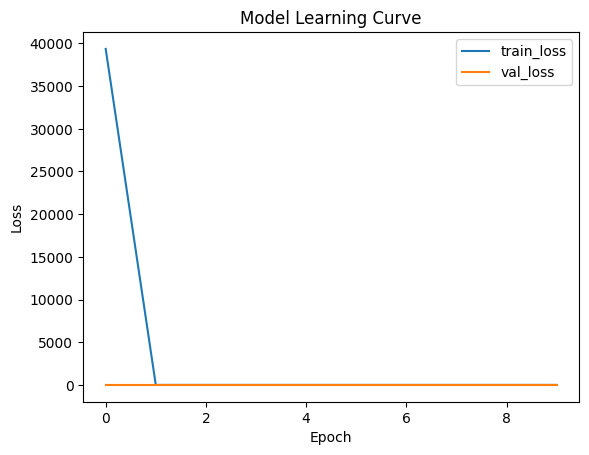

In [9]:
import matplotlib.pyplot as plt

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [40]:
import pickle
pickle.dump(model, open('nn_model_3.pkl','wb'))

2023-05-10 10:48:20.229236: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://77ba87bf-07ee-4bff-81fd-99e3927e6513/assets


In [34]:
# Define the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)


In [35]:
%%time
# Train the XGBoost model
xgb_model.fit(train_df[['userId', 'movieId']], train_df['rating'])

CPU times: user 7min 34s, sys: 11 s, total: 7min 45s

Wall time: 2min 28s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [36]:
# Evaluate the XGBoost model
test_loss = xgb_model.score(test_df[['userId', 'movieId']], test_df['rating'])
print(f'Test score: {test_loss:.4f}')

Test score: 0.0516


In [37]:
# Make predictions on the test set
y_pred = model.predict(test_df[['userId', 'movieId']])

In [38]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test_df['rating'], y_pred, squared=False)
print(f'RMSE: {rmse:.4f}')

RMSE: 1.0521


In [39]:
import pickle
pickle.dump(xgb_model, open('xgb_model.pkl','wb'))